In [1]:
from brian2 import *
from random import randrange
from collections import Counter
import math

In [2]:
def input_current_generator(max_I,delta_time,duration):
    output = TimedArray([(random() * max_I) * namp for i in range(int(duration/delta_time))],delta_time)
    return output

In [6]:
def make_neuron_group(ex_num = 800 , inh_num = 200 , Resistance = 5*Mohm , max_I = 30 , ex_tau = 12 , inh_tau = 13
                     ,pi_i = 0.05 , pi_e = 0.03 , pe_e = 0.03 , pe_i = 0.4
                     ,input_wi_i = -0.2*mV , input_wi_e = -0.5*mV , input_we_e = 0.2*mV , input_we_i = 0.001*mV):
    start_scope()
    N = ex_num + inh_num
    duration = 100 * ms
    delta_time = 1 * ms
    u_rest = -70 * mV
    threshold = -55 * mV

    Random_I = input_current_generator(max_I,delta_time,duration)

    eqs = '''
        du/dt = -(u-u_rest)/tau + Resistance * Random_I(t)/tau : volt
        tau : second
    '''
    neurons = NeuronGroup(N,eqs,threshold='u>threshold', reset='u=u_rest',method='linear')

    excitatory_neurons = neurons[:ex_num]
    excitatory_neurons.u = randrange(-75,-65) * mV
    excitatory_neurons.tau = ex_tau * ms

    inhibitory_neurons = neurons[ex_num:]
    inhibitory_neurons.u = randrange(-75,-65) * mV
    inhibitory_neurons.tau = inh_tau * ms

    i_i = Synapses(inhibitory_neurons, inhibitory_neurons,'wi_i : volt', on_pre='u_post += wi_i')
    i_i.connect(condition='i!=j', p=pi_i)
    i_i.wi_i = input_wi_i / math.sqrt(inh_num * pi_i)
    i_e = Synapses(inhibitory_neurons, excitatory_neurons,'wi_e : volt', on_pre='u_post += wi_e')
    i_e.connect(condition='i!=j', p=pi_e)
    i_e.wi_e = input_wi_e / math.sqrt(ex_num * pi_e)
    e_e = Synapses(excitatory_neurons, excitatory_neurons,'we_e : volt', on_pre='u_post += we_e')
    e_e.connect(condition='i!=j', p=pe_e)
    e_e.we_e = input_we_e / math.sqrt(ex_num * pe_e)
    e_i = Synapses(excitatory_neurons, inhibitory_neurons,'we_i : volt', on_pre='u_post += we_i')
    e_i.connect(condition='i!=j', p=pe_i)
    e_i.we_i = input_we_i / math.sqrt(inh_num * pe_i)

    State_M = StateMonitor(neurons, 'u', record=0)
    Spike_M = SpikeMonitor(neurons)
    
    run(duration)
    
    fig = plt.figure(constrained_layout=True)
    gs = fig.add_gridspec(4, 4)
    axs0 = fig.add_subplot(gs[:-2, :])
    axs1 = fig.add_subplot(gs[-2, :])
    axs2 = fig.add_subplot(gs[-1, :])
    
    fig.set_figwidth(18)
    fig.set_figheight(14)
    
    axs0.plot(Spike_M.t/ms, Spike_M.i, '.k', ms=1)
    axs0.set_ylabel('neuron number')
    
    axs0.grid()
    excitatory_spike_times = sorted(list(flatten([list(list(Spike_M.all_values()['t'].get(i))/ms) for i in range(N) if i<=ex_num-1])))
    inhibitory_spike_times = sorted(list(flatten([list(list(Spike_M.all_values()['t'].get(i))/ms) for i in range(N) if i>ex_num-1])))
    
    axs1.plot(list(Counter(excitatory_spike_times).keys()) ,[x*100/ex_num for x in list(Counter(excitatory_spike_times).values())],label = 'excitatory')
    axs1.plot(list(Counter(inhibitory_spike_times).keys()),[x*100/inh_num for x in list(Counter(inhibitory_spike_times).values())],label = 'inhibitory')
    axs1.set_ylabel('% of spiking neurons')
    axs1.legend()
    axs1.grid()
    
    axs0.set_title('#excitatory ='+str(ex_num)+' | #inhibitory ='+str(inh_num)+' | Resistance ='+str(Resistance)+' | excitatory_tau ='+str(excitatory_neurons.tau[0])
                  +' | inhibitory_tau ='+str(inhibitory_neurons.tau[0]) +' | Max_I ='+str(max_I) + '\n'
                  +' | pi_i ='+str(pi_i)+' | pi_e ='+str(pi_e)+' | pe_i ='+str(pe_i)+' | pe_e ='+str(pe_e)
                  +' | wi_i ='+str(input_wi_i)+' | wi_e ='+str(input_wi_e)+' | we_i ='+str(input_we_i)+' | we_e ='+str(input_we_e))
    
    axs2.plot(np.arange(duration/ms),list(Random_I.values*1000000000))
    axs2.set_ylabel('amplitude (namp)')
    axs2.set_xlabel('time (ms)')
    axs2.grid()
    

    return State_M , Spike_M , i_i

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


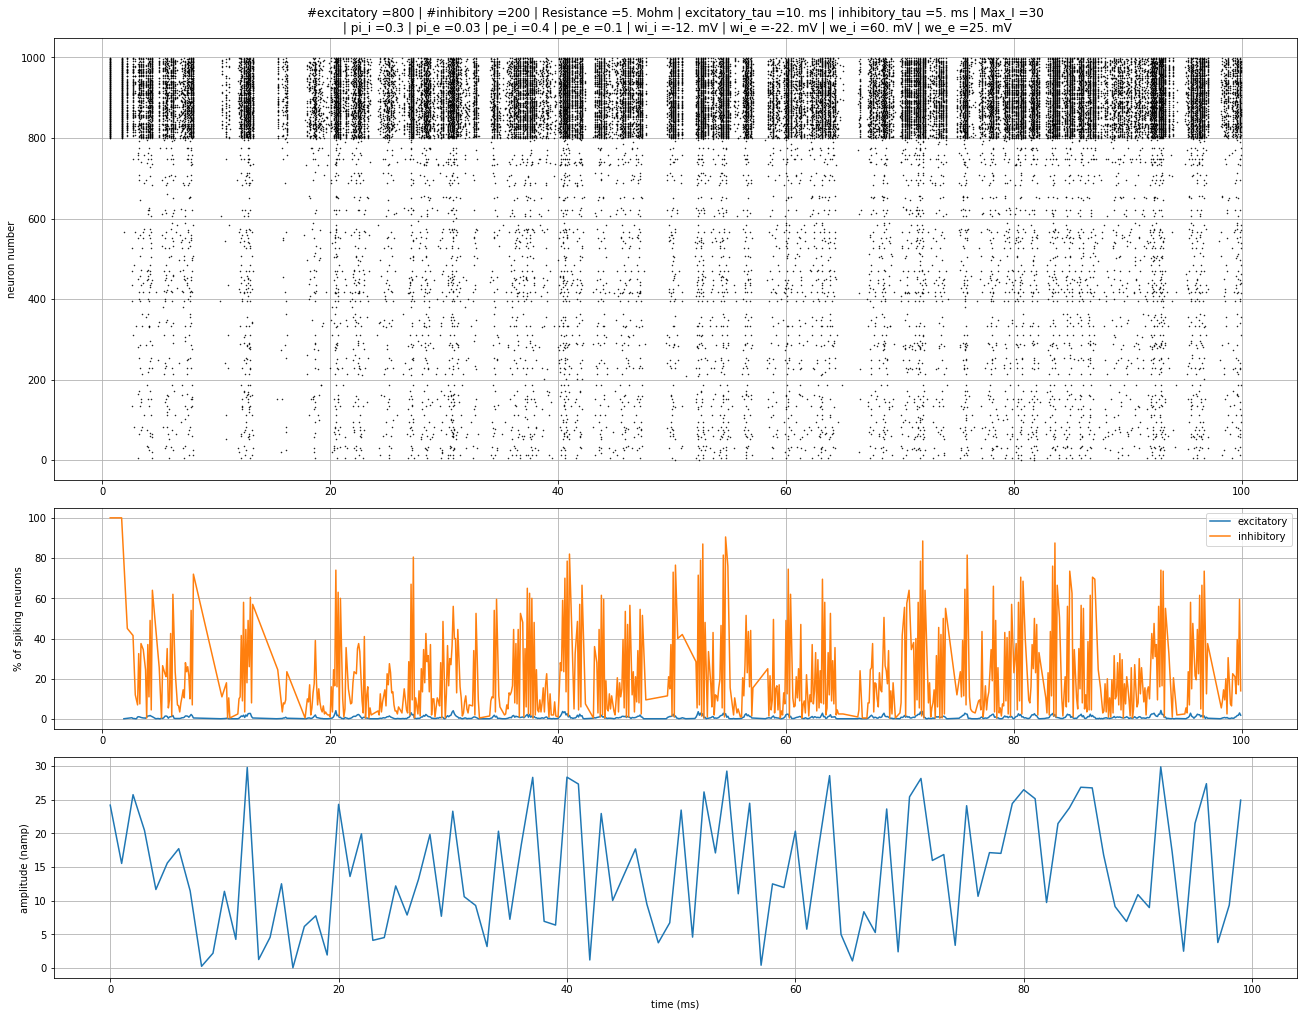

In [7]:
State_M , Spike_M , i_i= make_neuron_group(Resistance = 5*Mohm , max_I = 30 , ex_tau=10 , inh_tau= 5
                    ,pi_i = 0.3 , pi_e = 0.03 , pe_e = 0.1 , pe_i = 0.4
                    ,input_wi_i = -12*mV , input_wi_e = -22*mV , input_we_e = 25*mV , input_we_i = 60*mV)

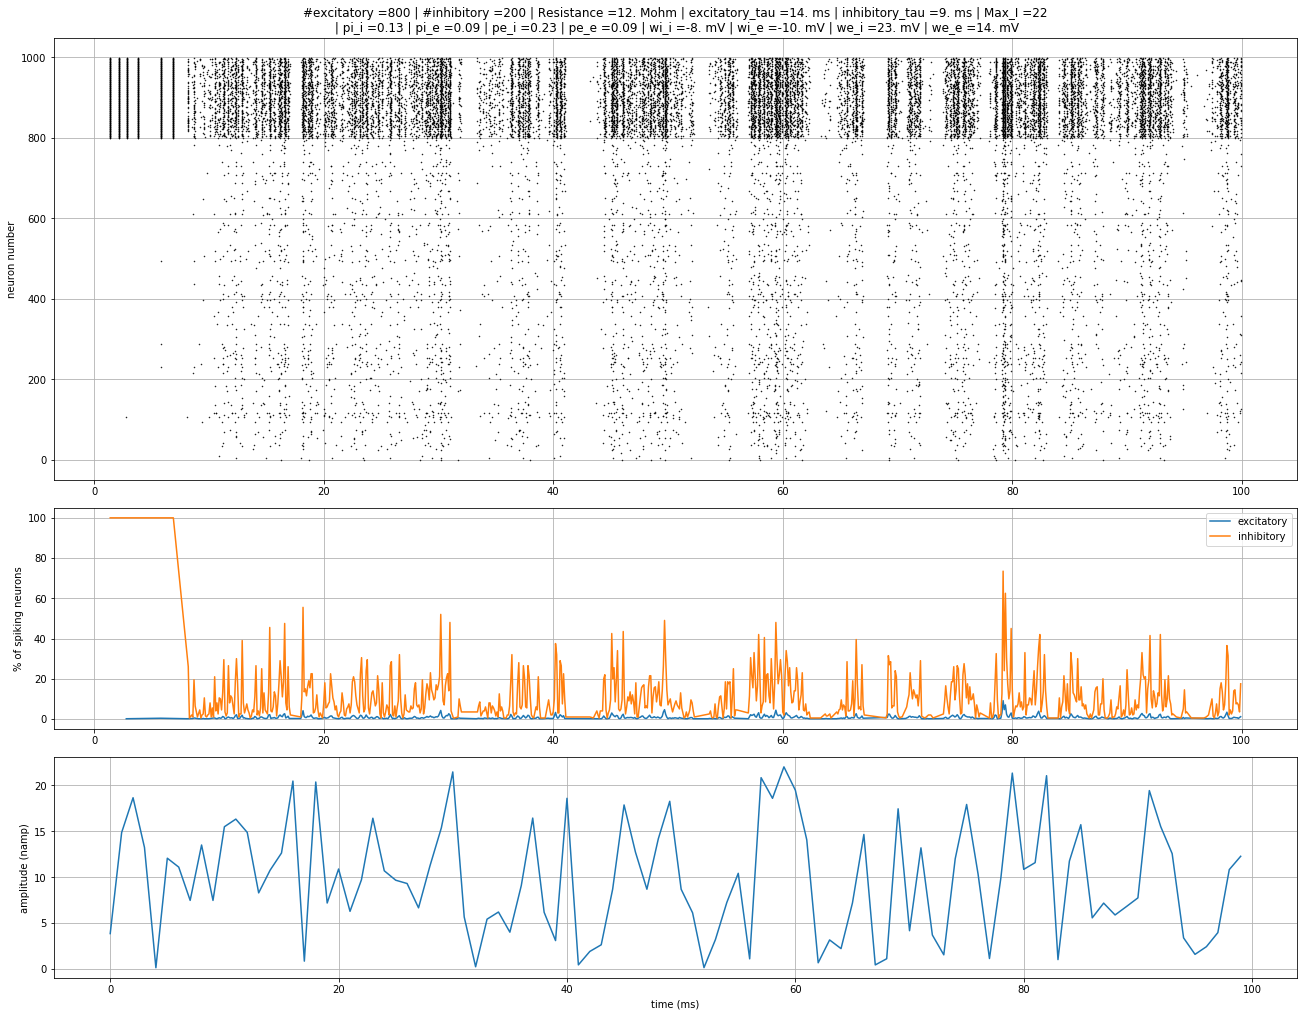

In [16]:
State_M , Spike_M , i_i= make_neuron_group(Resistance = 12*Mohm , max_I = 22 , ex_tau=14 , inh_tau= 9
                    ,pi_i = 0.13 , pi_e = 0.09 , pe_e = 0.09 , pe_i = 0.23
                    ,input_wi_i = -8*mV , input_wi_e = -10*mV , input_we_e = 14*mV , input_we_i = 23*mV)

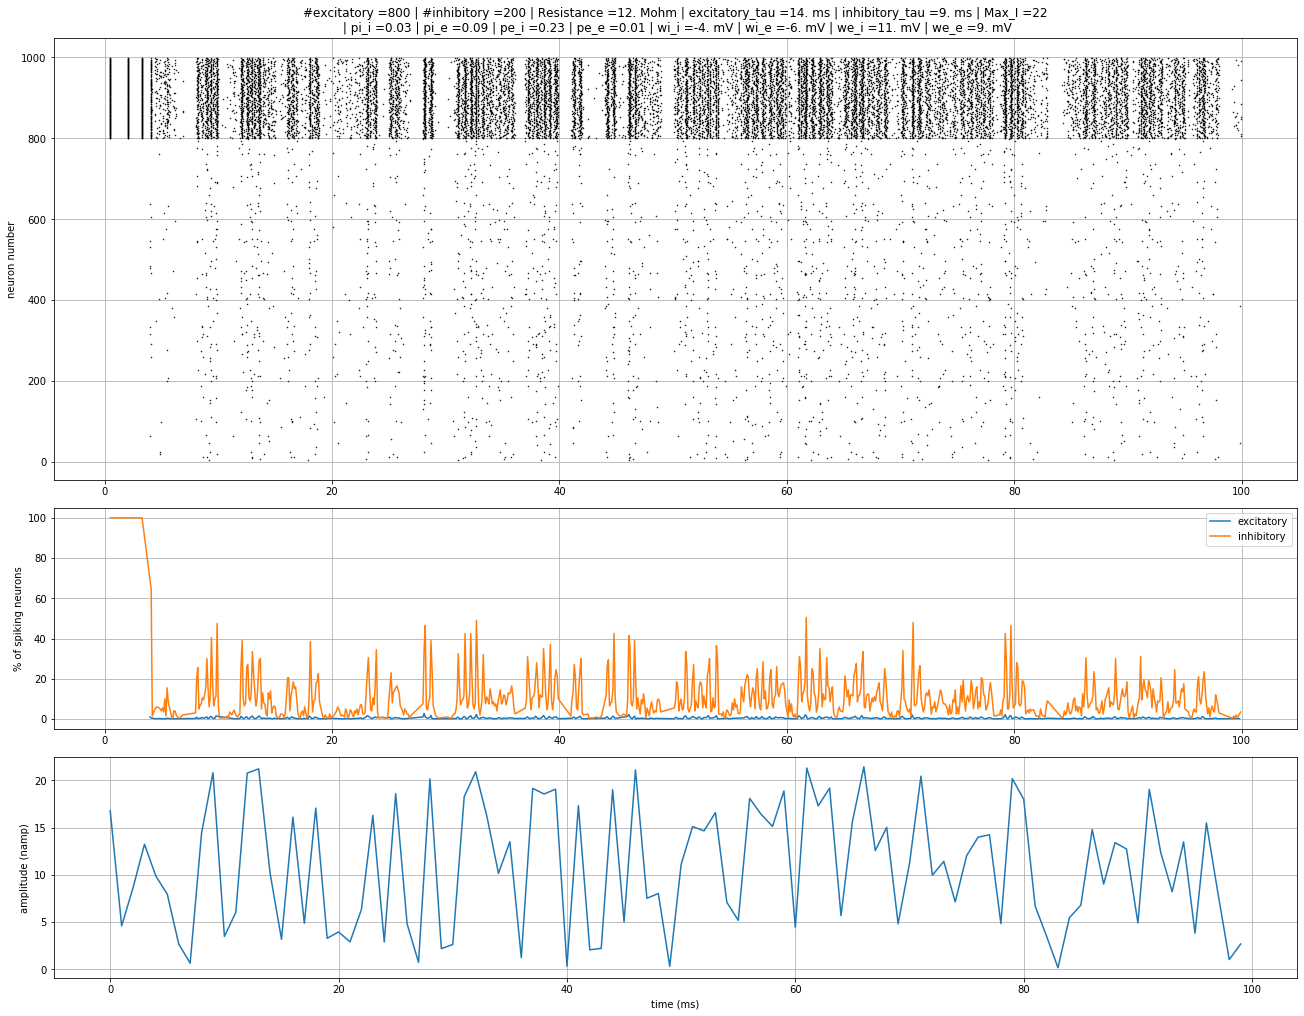

In [18]:
State_M , Spike_M , i_i= make_neuron_group(Resistance = 12*Mohm , max_I = 22 , ex_tau=14 , inh_tau= 9
                    ,pi_i = 0.03 , pi_e = 0.09 , pe_e = 0.01 , pe_i = 0.23
                    ,input_wi_i = -4*mV , input_wi_e = -6*mV , input_we_e = 9*mV , input_we_i = 11*mV)

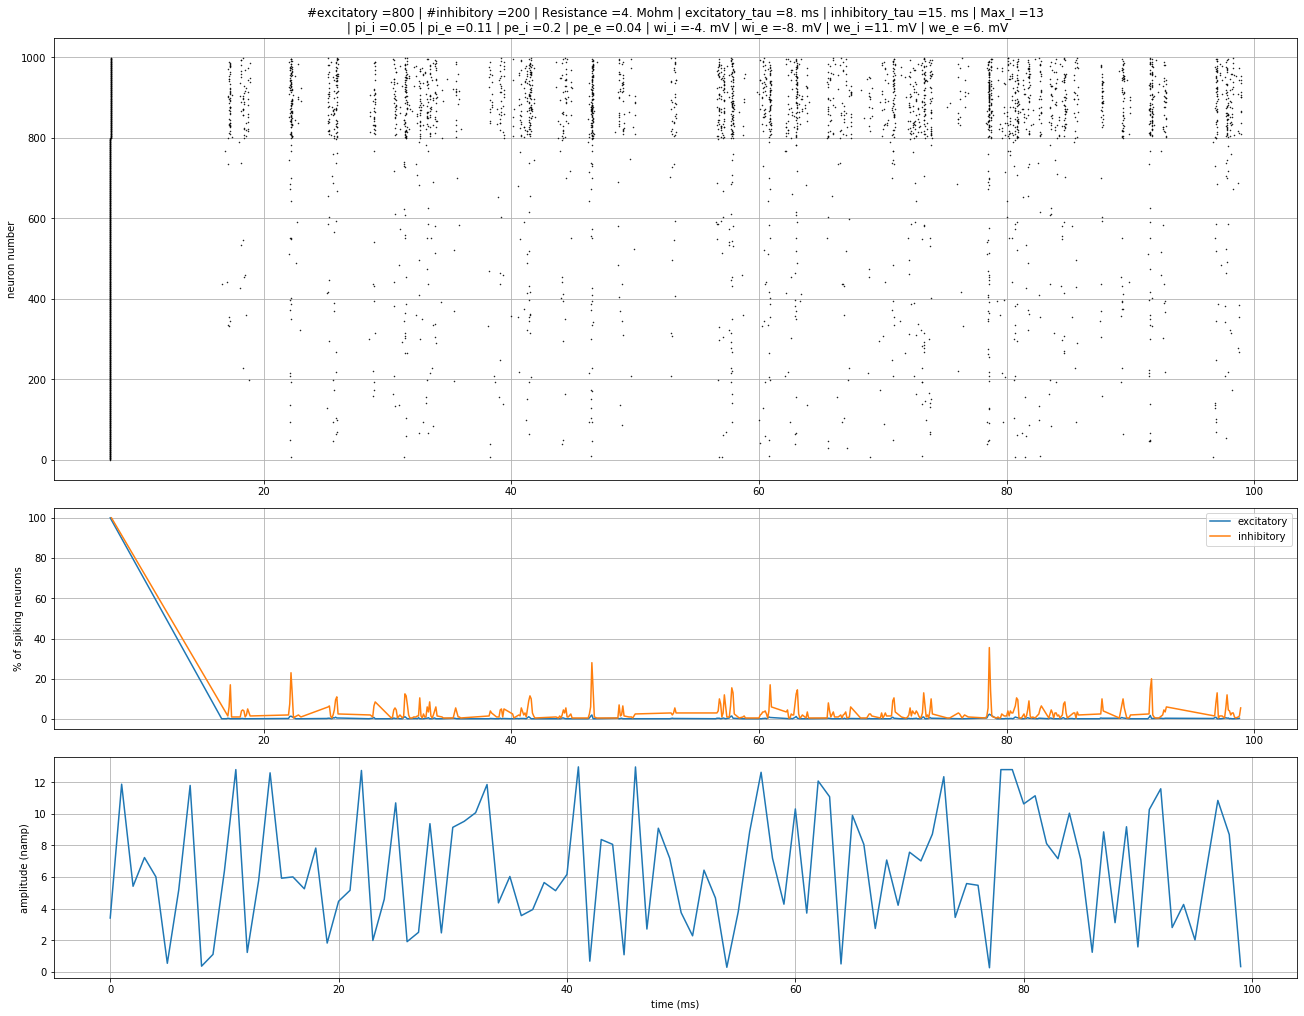

In [22]:
State_M , Spike_M , i_i= make_neuron_group(Resistance = 4*Mohm , max_I = 13 , ex_tau=8 , inh_tau= 15
                    ,pi_i = 0.05 , pi_e = 0.11 , pe_e = 0.04 , pe_i = 0.2
                    ,input_wi_i = -4*mV , input_wi_e = -8*mV , input_we_e = 6*mV , input_we_i = 11*mV)

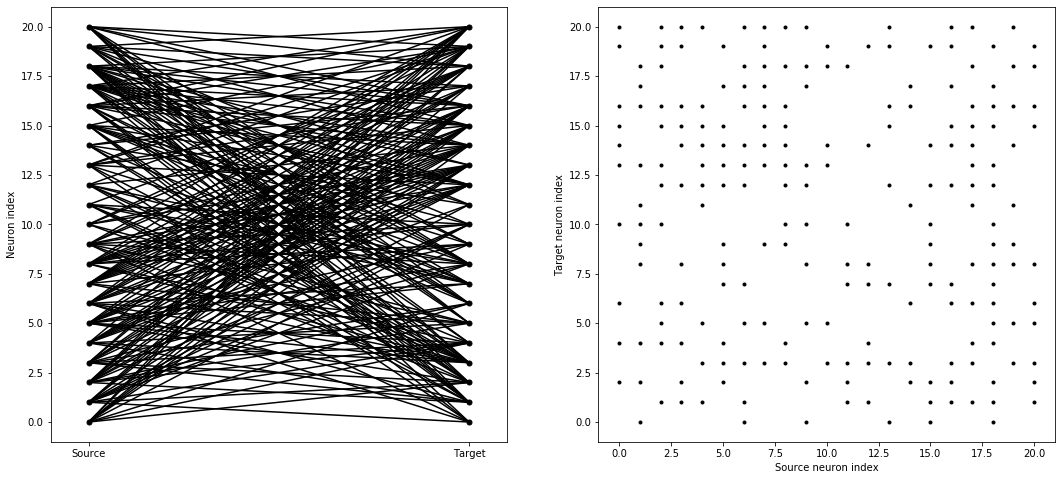

In [79]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(18, 8))
    subplot(121)
    plot(zeros(Ns), arange(Ns), '.k', ms=10)
    plot(ones(Nt), arange(Nt), '.k', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
        xticks([0, 1], ['Source', 'Target'])
        ylabel('Neuron index')
        xlim(-0.1, 1.1)
        ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, '.k')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(i_i)